In [16]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

## Load the Dataset:

In [17]:
df = pd.read_csv('data_banknote_authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


## Shuffle Dataset:

In [18]:
# Get the number of rows in the DataFrame
n = len(df)

# Create a list of indices from 0 to n-1
indices = list(range(n))

# Shuffle the indices randomly
random.shuffle(indices)

# Use the shuffled indices to reorder the rows of the DataFrame
df_shuffled = df.iloc[indices].reset_index(drop=True)

In [19]:

# Select features and labels
X = df_shuffled[['variance', 'skewness']].values
y = df_shuffled['class'].values

## Standarize Dataset:

In [20]:
# Step 1: Compute the mean of each feature/column
mean = np.mean(X, axis=0)

# Step 2: Compute the standard deviation of each feature/column
std_dev = np.std(X, axis=0)

# Step 3: Subtract the mean from each value in the corresponding feature/column
X = X - mean

# Step 4: Divide each value in the corresponding feature/column by the standard deviation
X = X / std_dev

print(X)




[[-0.68241448 -0.31567007]
 [-1.09797173 -0.34423896]
 [ 0.20926179  1.33710083]
 ...
 [ 0.61735878  0.13861594]
 [ 0.25627546  1.42668806]
 [ 0.7351041   0.05361374]]


In [21]:
# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

X

array([[-0.68241448, -0.31567007],
       [-1.09797173, -0.34423896],
       [ 0.20926179,  1.33710083],
       ...,
       [ 0.61735878,  0.13861594],
       [ 0.25627546,  1.42668806],
       [ 0.7351041 ,  0.05361374]])

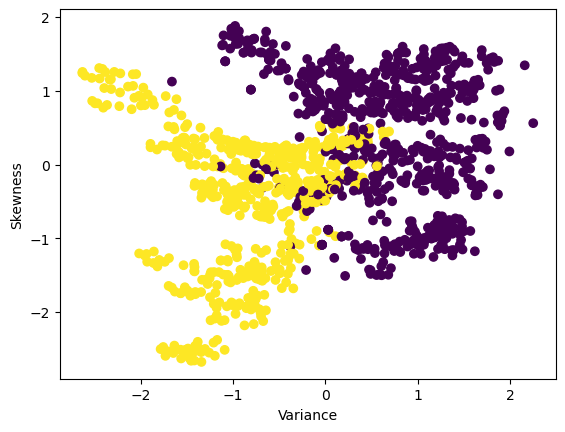

In [22]:
# Scatter plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



## Percepton Algorithm :


In [23]:
class Perceptron:
    def __init__(self, learning_rate=0.001, n_iters=1000, random_state=None):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.random_state = random_state
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias randomly
        if self.random_state is not None:
            np.random.seed(self.random_state)
        self.weights = np.random.randn(n_features)
        self.bias = np.random.randn()
        
        # Update weights and bias based on errors
        for i in range(self.n_iters):
            errors = 0
            for j in range(n_samples):
                linear_output = np.dot(self.weights, X[j]) + self.bias
                y_pred = self._activate(linear_output)
                
                update = self.learning_rate * (y[j] - y_pred)
                self.weights += update * X[j]
                self.bias += update
                
                errors += int(update != 0.0)
            if errors == 0:
                break
                
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self._activate(linear_output)
        return y_pred
    
    def _activate(self, linear_output):
        return np.where(linear_output >= 0.5, 1 , 0)


## Test using percepton

In [24]:
# Initialize and fit the Perceptron model
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)


In [25]:

# Make predictions on the test set and calculate the accuracy
y_pred = perceptron.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8909090909090909


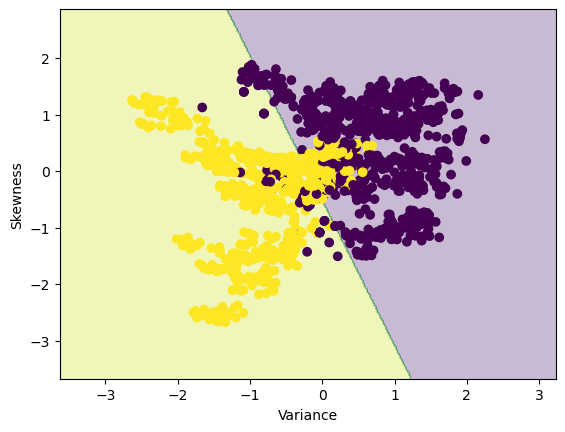

In [26]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.show()


## Adaline Algorithm :


In [27]:

class Adaline:
    def __init__(self, learning_rate=0.0001, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    
    def fit(self, X, y):
        # Initialize weights to small random numbers
        self.weights = np.random.rand(X.shape[1] + 1)
        
        # Add bias term to X
        X = np.insert(X, 0, 1, axis=1)
        
        for i in range(self.n_iterations):
            # Calculate net input
            net_input = np.dot(X, self.weights)
            
            # Calculate output
            output = self.activation(net_input)
            
            # Calculate error
            error = y - output
            
            # Update weights
            self.weights += self.learning_rate * np.dot(X.T, error)
    
    def predict(self, X):
        # Add bias term to X
        X = np.insert(X, 0, 1, axis=1)
        
        # Calculate net input
        net_input = np.dot(X, self.weights)
        
        # Calculate output
        output = self.activation(net_input)
        
        return np.where(output >= 0.5, 1, 0)
    
    def activation(self, X):
        # Use linear activation function
        return X


## Test using adaline

In [28]:
adaline = Adaline(learning_rate=0.001, n_iterations=1000)
adaline.fit(X_train, y_train)

# Make predictions on the test set and calculate the accuracy
y_pred_adaline = adaline.predict(X_test)
accuracy = np.sum(y_pred_adaline == y_test) / len(y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9018181818181819


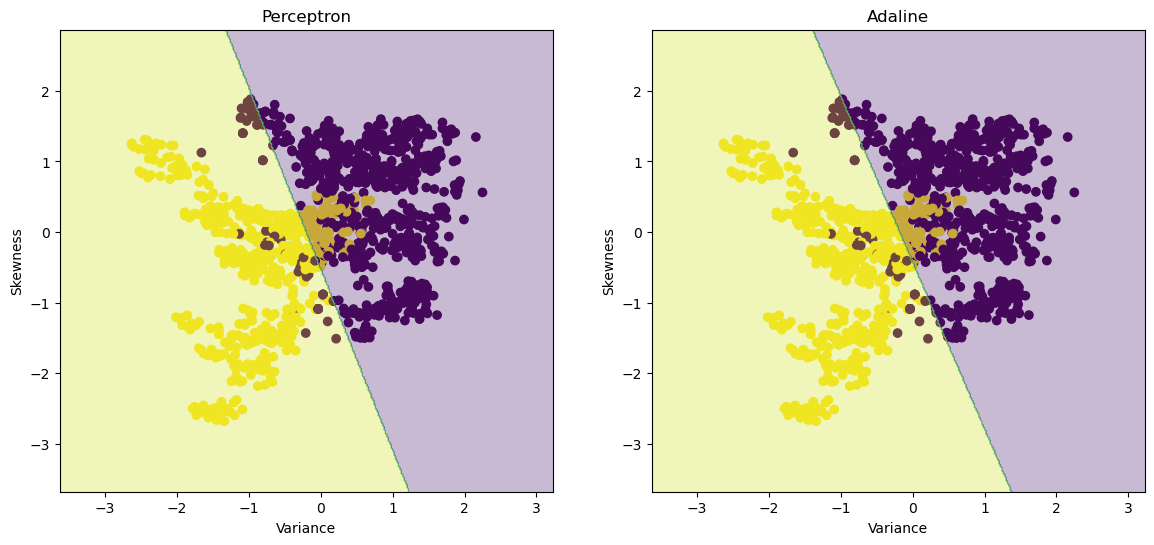

In [29]:
# Plot the decision boundaries for both algorithms
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].scatter(X[:, 0], X[:, 1], c=y)
ax[0].set_xlabel('Variance')
ax[0].set_ylabel('Skewness')
ax[0].set_title('Perceptron')
ax[1].scatter(X[:, 0], X[:, 1], c=y)
ax[1].set_xlabel('Variance')
ax[1].set_ylabel('Skewness')
ax[1].set_title('Adaline')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z1 = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
ax[0].contourf(xx, yy, Z1, alpha=0.3)
Z2 = adaline.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
ax[1].contourf(xx, yy, Z2, alpha=0.3)
plt.show()



## Compare between the two algorithms

In [30]:
# Compare errors in both algorithms
y_pred_perceptron = perceptron.predict(X_test)
perceptron_errors = np.sum(y_pred_perceptron != y_test)

y_pred_adaline = adaline.predict(X_test)
adaline_errors = np.sum(y_pred_adaline != y_test)

print(f"Perceptron errors: {perceptron_errors}")
print(f"Adaline errors: {adaline_errors}")

Perceptron errors: 30
Adaline errors: 27
